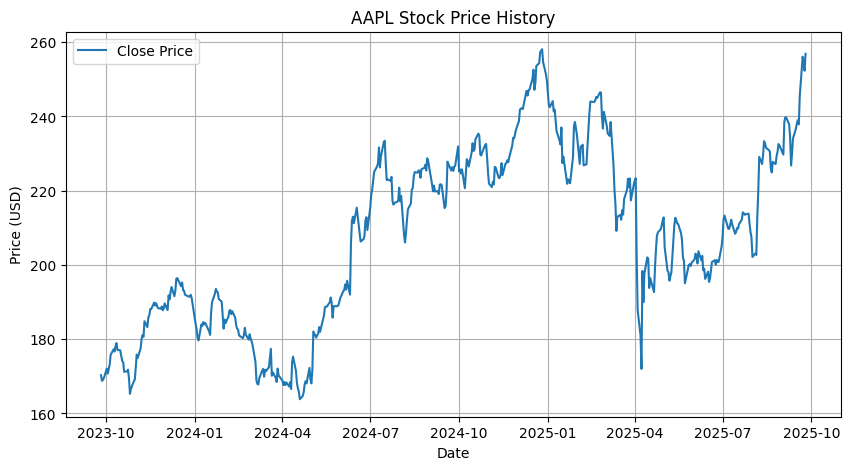

In [1]:
# Import yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get stock data
ticker = "AAPL"
stock = yf.Ticker(ticker)
hist = stock.history(period="2y")

# Plot history
plt.figure(figsize=(10, 5))
plt.plot(hist.index, hist['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

## Estimating parameters of the GBM from historical data

### 1. Estimating Volatility $\sigma$ (John Hull chapter 15.4)

- $S_i$: stock price at time $i$ with $i=0,1,2,\ldots,n$
- $\tau$: length of time interval in years

Given log return
$$ r_i = \ln\left(\frac{S_i}{S_{i-1}}\right), \quad i=1,2,\ldots,n $$
The estimator of $\sigma \sqrt{\tau}$ is the sample standard deviation of the log returns
$$ s = \sqrt{\frac{1}{n-1} \sum_{t=1}^n (r_t - \bar{r})^2}, \quad \bar{r} = \frac{1}{n} \sum_{t=1}^n r_t$$
So $\sigma$ is estimated as $\hat{\sigma}$, where
$$ \hat{\sigma} = \frac{s}{\sqrt{\tau}} $$

### 2. Estimating Drift $\mu$

Suppose that $S \sim \text{GBM}(\mu, \sigma)$, i.e. $dS_t = \mu dt + \sigma dW_t$. Then the solution by solving the SDE is given by
$$ S_t = S_s e^{ (\mu - \frac{1}{2} \sigma^2) (t-s) + \sigma (W_t - W_s)}, \quad s<t$$

We have that

$$r_t = \ln \left( \frac{S_t}{S_{t-1}} \right) = (\mu - \frac{1}{2} \sigma^2 ) \Delta t + \sigma W_{\Delta t} \sim \mathcal{N} \left( (\mu - \frac{1}{2} \sigma^2 ) \Delta t, \sigma^2 \Delta t \right)$$

So $\bar{r}$ is an estimator for $(\mu - \frac{1}{2} \sigma^2 )\Delta t$ and the estimator for the drift $\hat{\mu}$ is given by

$$ \hat{\mu} = \frac{\bar{r}}{\Delta t} + \frac{1}{2} \hat{\sigma}^2$$

In [2]:
import numpy as np

# Calculate log returns
hist['Log Return'] = np.log(hist['Close'] / hist['Close'].shift(1))

# Annualized volatility
vol = hist['Log Return'].std() * np.sqrt(252) 

# Annualized mean return
mu = np.mean(hist['Log Return'].dropna()) * 252 + 0.5 * vol**2

def generate_path(years=2):

    S_0 = hist['Close'].iloc[0]

    # Simulate 2 years
    dt = 1/252

    dX = np.random.normal(
        loc = (mu - 0.5 * vol**2) * dt,
        scale = vol * np.sqrt(dt),
        size = 252*years-1
    )

    return S_0 * np.exp(np.cumsum(np.insert(dX, 0, 0)))

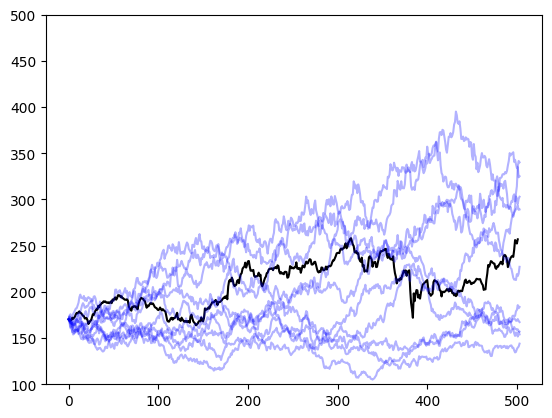

In [77]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.set_ylim([100, 500])

hist_close_series = hist['Close'].iloc[0:503]

hist_close_series.index = range(502)

plt.plot(hist_close_series, label='Historical Close Price', color='black')
 
for _ in range(10):
    path = generate_path()
    plt.plot(path, color='blue', alpha=0.3)

plt.show()